In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
A = np.genfromtxt('/home/qsimexpcontrol/LabRAD/Qsim/Ipython-Notebooks/nist_data_3.csv', delimiter='|', autostrip=True, dtype=None)

/home/qsimexpcontrol/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [42]:

def wav2RGB(wavelength):
    w = wavelength
    if w >= 380 and w < 440:
        R = -(w - 440.) / (440. - 350.)
        G = 0.0
        B = 1.0
    elif w >= 440 and w < 490:
        R = 0.0
        G = (w - 440.) / (490. - 440.)
        B = 1.0
    elif w >= 490 and w < 510:
        R = 0.0
        G = 1.0
        B = -(w - 510.) / (510. - 490.)
    elif w >= 510 and w < 580:
        R = (w - 510.) / (580. - 510.)
        G = 1.0
        B = 0.0
    elif w >= 580 and w < 645:
        R = 1.0
        G = -(w - 645.) / (645. - 580.)
        B = 0.0
    elif w >= 645 and w <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    elif w > 780:
        R = 1.0
        G = 0.0
        B = 0.0
    elif w < 380:
        R = 1.0
        G = 0.0
        B = 1
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    # intensity correction
    if w >= 380 and w < 420:
        SSS = 0.3 + 0.7*(w - 350) / (420 - 350)
    elif w >= 420 and w <= 700:
        SSS = 1.0
    elif w > 700 and w <= 780:
        SSS = 0.3 + 0.7*(780 - w) / (780 - 700)
    elif w > 780:
        SSS = 0.3
    elif w < 380:
        SSS = 0.6
    else:
        SSS = 0
    SSS *= 255
    return [int(SSS*R)/255., int(SSS*G)/255., int(SSS*B)/255.]

In [45]:
new_array = []
prev_term = 'init'
for row in range(A.shape[0]):
    if A[row][-1] != A[row][-1]:
        continue
    if (A[row][-1] != ''):
        if A[row][1] == '':
            A[row][1] = prev_term
        else:
            prev_term = A[row][1]
        new_array.append(A[row])
new_array = np.array([new_array])
new_array = new_array[0]
new_array = new_array[0:15]

In [46]:
frac_dict = {'1/2': 0.5, '3/2':1.5, '5/2': 2.5, '7/2': 3.5, '9/2': 4.5, '11/2': 5.5, '13/2': 6.5, '15/2': 7.5}

def get_dipoles(level, all_levels):
    transitions = []
    for i, second_level in enumerate(all_levels):
        term_1 = level[1]
        term_2 = second_level[1]
        delta_J = abs(frac_dict[level[2]] - frac_dict[second_level[2]])
        if delta_J in [0.0, 1.0]:
            if second_level[3] > level[3]:
                if (('*' in term_1) and ('*' not in term_2)) or (('*' in term_2) and ('*' not in term_1)):
                    transitions.append(second_level)
    return transitions

def get_quadrapoles(level, all_levels):
    transitions = []
    for i, second_level in enumerate(all_levels):
        term_1 = level[1]
        term_2 = second_level[1]
        delta_J = abs(frac_dict[level[2]] - frac_dict[second_level[2]])
        if delta_J in [1.0, 2.0]:
            if second_level[3] > level[3]:
                if (('*' in term_1) and ('*' in term_2)) or (('*' not in term_2) and ('*' not in term_1)):
                    if second_level[3] - level[3] > 12000: # ignore redder transitions than 4 um
                        transitions.append(second_level)
    return transitions
    
def get_orbital(term, J):
    if 'S' in term:
        orbital = 'S'
    elif 'P' in term:
        orbital = 'P'
    elif 'D' in term:
        orbital = 'D'
    elif 'F' in term:
        orbital = 'F'
    elif 'G' in term:
        orbital = 'G'
    elif ('*' in term) and ((J == '1/2') or (J == '3/2')): #odd P-like J
        orbital = 'P'
    elif ('*' in term) and ((J == '5/2') or (J == '7/2')): #odd F-like J
        orbital = 'F'
    elif ('*' in term) and ((J == '9/2') or (J == '11/2')): #odd H-like J
        orbital = 'H'
    elif ('*' in term) and ((J == '13/2') or (J == '15/2')): #odd J-like J
        orbital = 'J'
    elif J == '1/2': # even S-like J
        orbital = 'S'
    elif (J == '3/2' or J == '5/2'): # even D-like J
        orbital = 'D'
    elif (J == '7/2' or J == '9/2'): # even G-like J
        orbital = 'G'
    elif (J == '11/2' or J == '13/2'): # even I-like J
        orbital = 'I'
    elif (J == '15/2' or J == '17/2'): # even K-like J
        orbital = 'K'
    return orbital

2S1/2


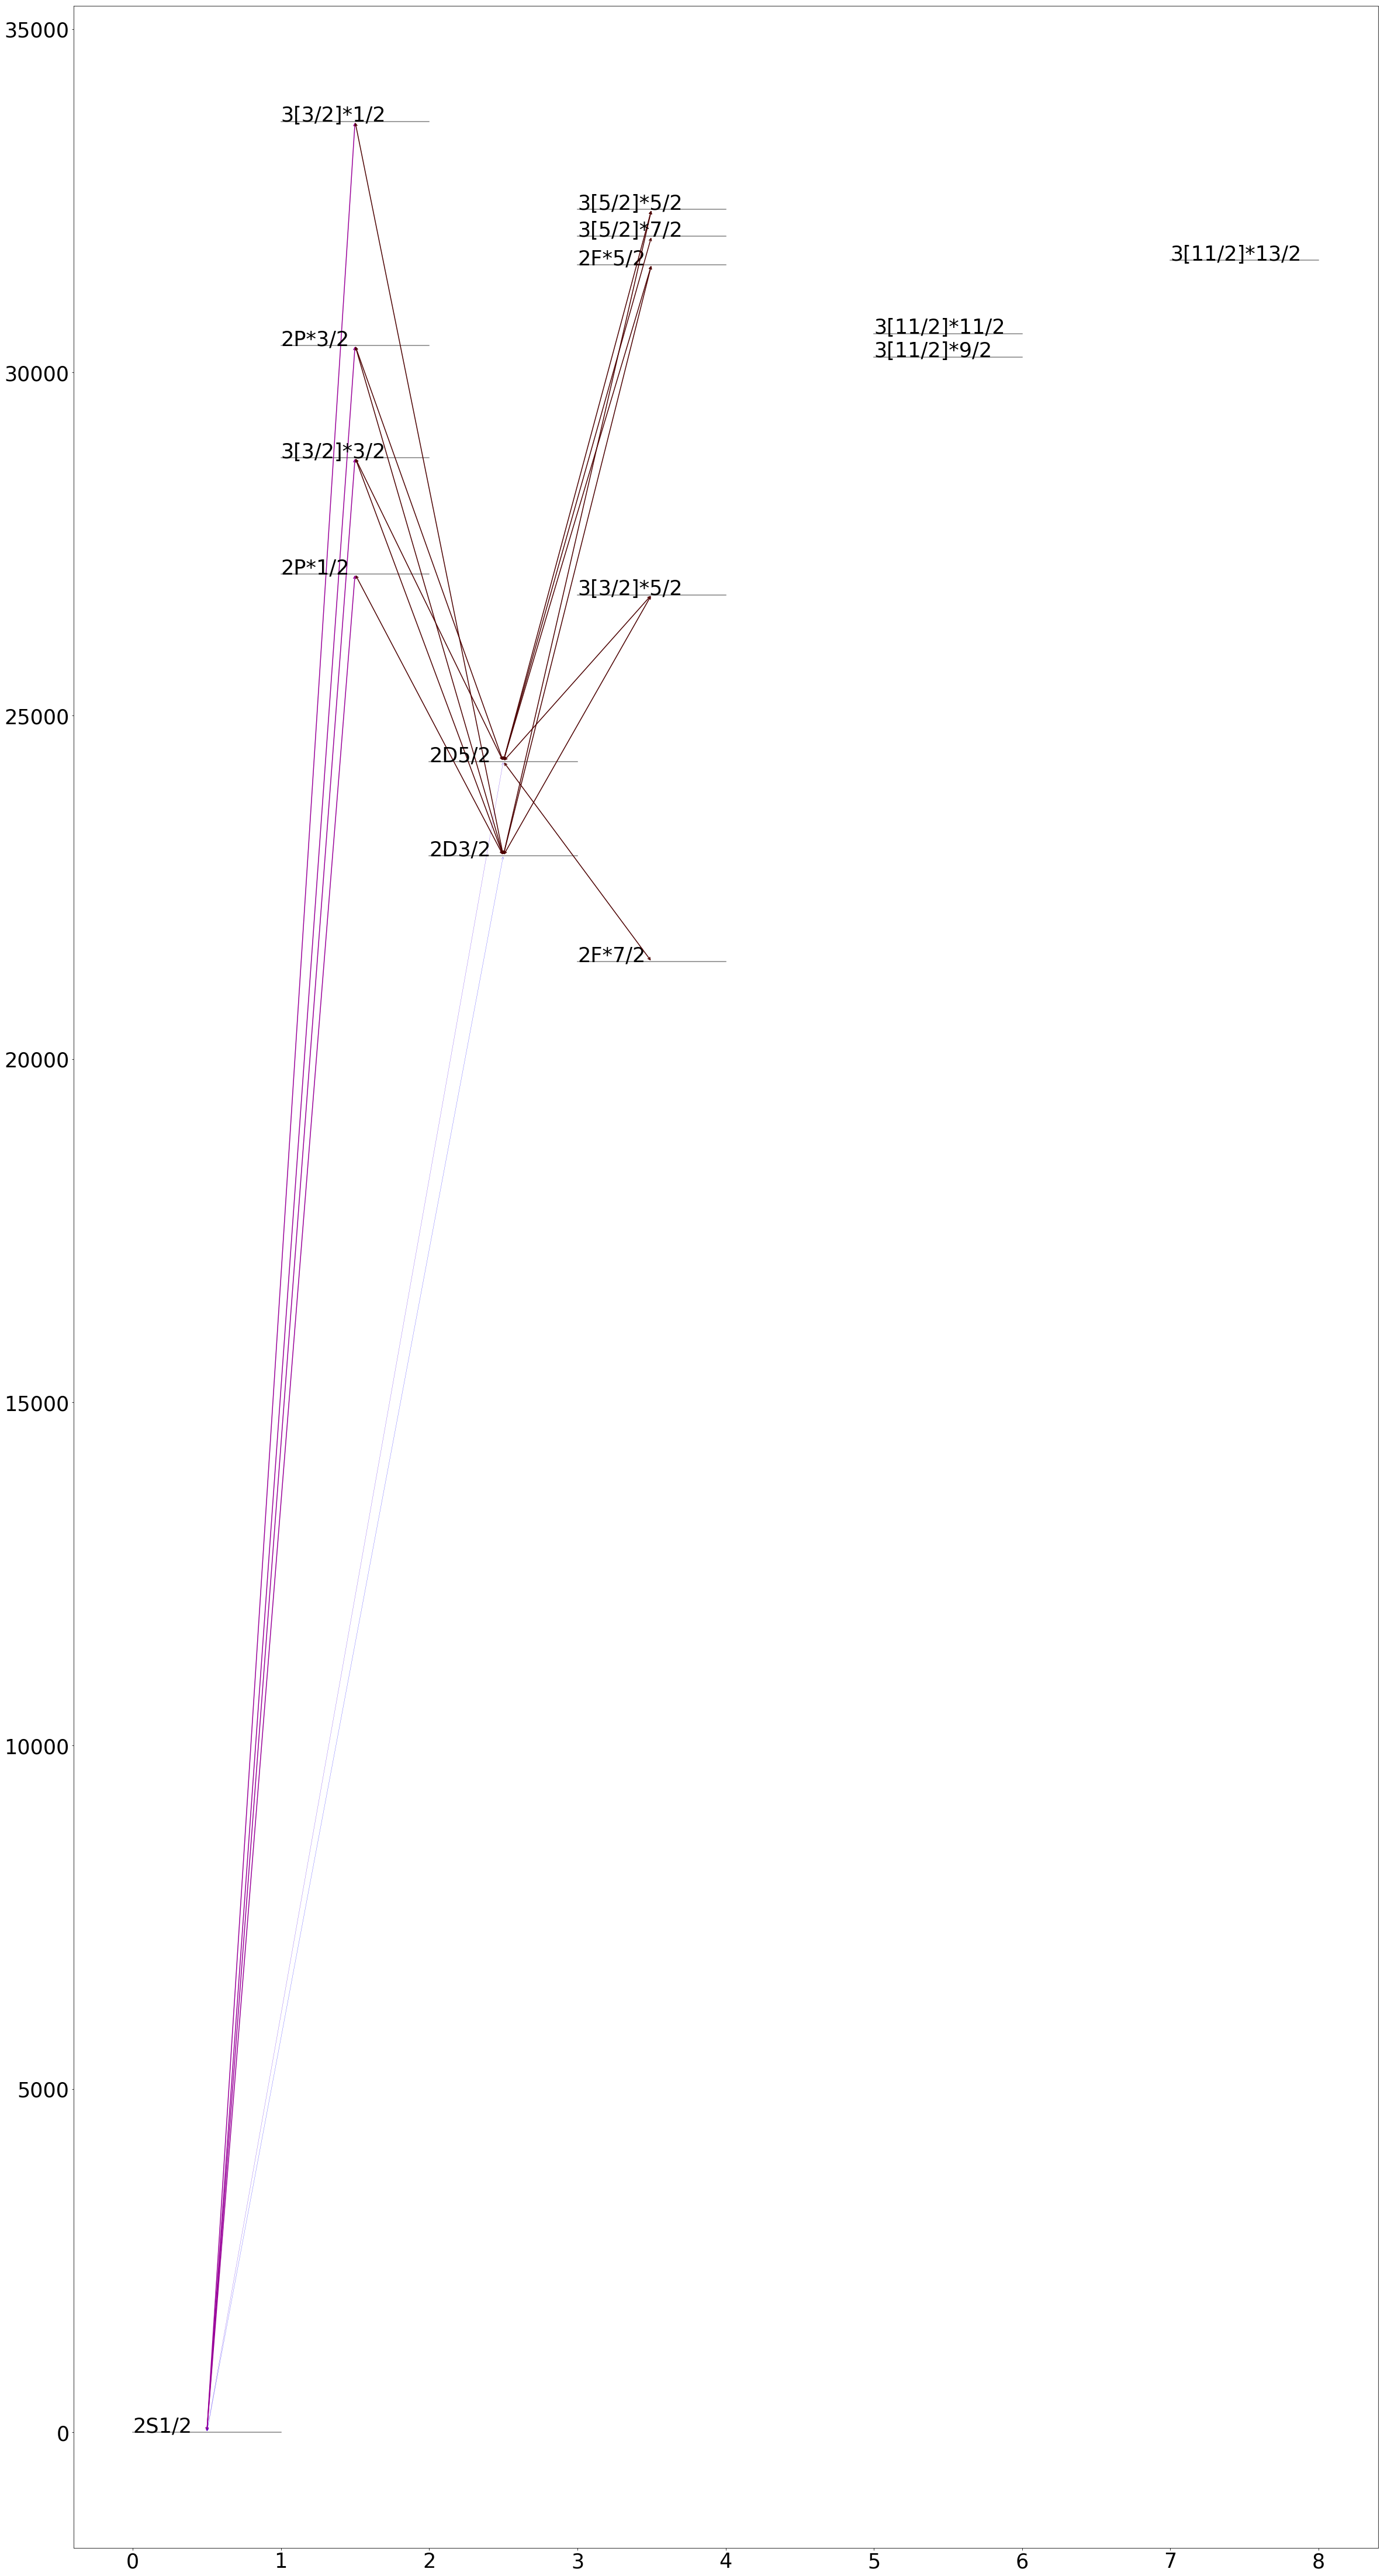

In [48]:
plt.rcParams['figure.figsize'] = [40, 80]
fig = plt.figure()
ax = fig.add_subplot(111)
orbit_dict = {'S':0, 'P':1, 'D':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7, 'K':8}
for i, level in enumerate(new_array):
    dipoles = get_dipoles(level, new_array)
    quadrapoles = get_quadrapoles(level, new_array)
    energy = level[3]
    term = level[1]
    J = level[2]
    orbital = get_orbital(term, J)
    if orbital == 'S':
        x = [0,1]
    if orbital == 'P':
        x = [1,2]
    if orbital == 'D':
        x = [2,3]
    if orbital == 'F':
        x = [3,4]
    if orbital == 'G':
        x = [4,5]
    if orbital == 'H':
        x = [5,6]
    if orbital == 'I':
        x = [6,7]
    if orbital == 'J':
        x = [7,8]
    if orbital == 'K':
        x = [8,9]

    if energy != 0.0:
        ax.text(x[0], energy, term + J, size = 35)
        ax.plot(x, [energy, energy], color='gray')
    else:
        print term + J
        ax.text(x[0], energy, term + J, size = 35)
        ax.plot(x, [energy, energy], color='gray')
    plt.tick_params(labelsize=35)
    
    for i, dipole in enumerate(dipoles):
        start = x[0] + 0.5, energy
        direction = np.sign(frac_dict[J] - frac_dict[dipole[2]])
        wavelength = 1e7/(dipole[-1] - energy)
#        print wavelength
        color = wav2RGB(wavelength)
#        print color
        J_dip = dipole[2]
        dip_orbit = get_orbital(dipole[1], J_dip)
        direction = np.sign(orbit_dict[dip_orbit] - orbit_dict[orbital])
        ax.annotate(s='',
                    xy=(start),
                    xytext=(x[0] + 0.5 + direction*1.,
                    dipole[-1]),
                    arrowprops=dict(color=color, arrowstyle='<->', linewidth=1.5))
    for quadrapole in quadrapoles:
        start = x[0] + 0.5, energy
        direction = np.sign(frac_dict[J] - frac_dict[dipole[2]])
        wavelength = 1e7/(quadrapole[-1] - energy)
        color = wav2RGB(wavelength)
        J_quad = quadrapole[2]
        quad_orbit = get_orbital(quadrapole[1], J_quad)
        direction = np.sign(orbit_dict[quad_orbit] - orbit_dict[orbital])
        ax.annotate(s='',
                    xy=(start),
                    xytext=(x[0] + 0.5 + direction*2.,
                    quadrapole[-1]),
                    arrowprops=dict(color=color, arrowstyle='<->', linewidth=0.25))
        

#plt.savefig('/home/qsimexpcontrol/plots/grotrian/grotrian_first_65.png')

In [30]:
plt.savefig('/home/qsimexpcontrol/plots/grotrian/grotrian_first _75.png')